In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
df = pd.read_csv('../data/1.train_data.csv')
keyword = df.keyword
keyword.head()

0      覚醒剤
1     雷 落雷
2       血液
3    ハリケーン
4      殺人鬼
Name: keyword, dtype: object

In [3]:
keywords = keyword.to_list()

In [4]:
print(len(keywords))
print(len(set(keywords)))

20285
315


In [5]:
keywords[:10]

['覚醒剤', '雷 落雷', '血液', 'ハリケーン', '殺人鬼', '土砂崩れ', '警察官', '血まみれの', '自然災害', '死傷者']

In [29]:
def replace_rule(text):
    words = text.split(" ")
    for i in range(len(words)):
        words[i] = re.sub(r"(する|した|の|犯|者|官|事態|証言)$", "", words[i])
        words[i] = re.sub(r"\S+テロ", "テロ", words[i])
        words[i] = re.sub(r"\S+雷", "雷", words[i])
        words[i] = re.sub(r"\S+衝突", "衝突", words[i])
        words[i] = re.sub(r"\S*殺人\S*", "殺人", words[i])
    words = sorted(list(set(words)))
    return " ".join(words)
    
# 助詞やいらない部分を削除
df['nkeyword'] = df.keyword.apply(replace_rule)
nkeywords = df.nkeyword.to_list()
print(len(nkeywords))
print(len(set(nkeywords)))

20285
272


In [30]:
df['querynum'] = df.nkeyword.apply(lambda x: len(x.split(" ")))

flg             0       1
querynum                 
1         18573.0  1366.0
2           264.0    66.0
3            12.0     2.0
4             2.0     NaN


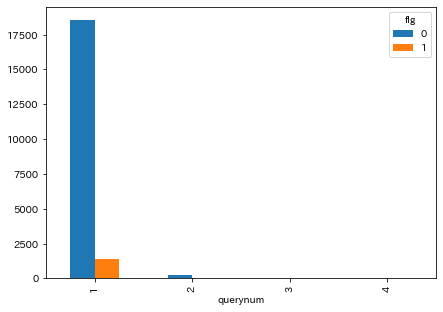

In [32]:
flg_by_query = df.groupby('querynum').flg.value_counts().unstack()
print(flg_by_query)
flg_by_query.plot(kind='bar', figsize=(7, 5))

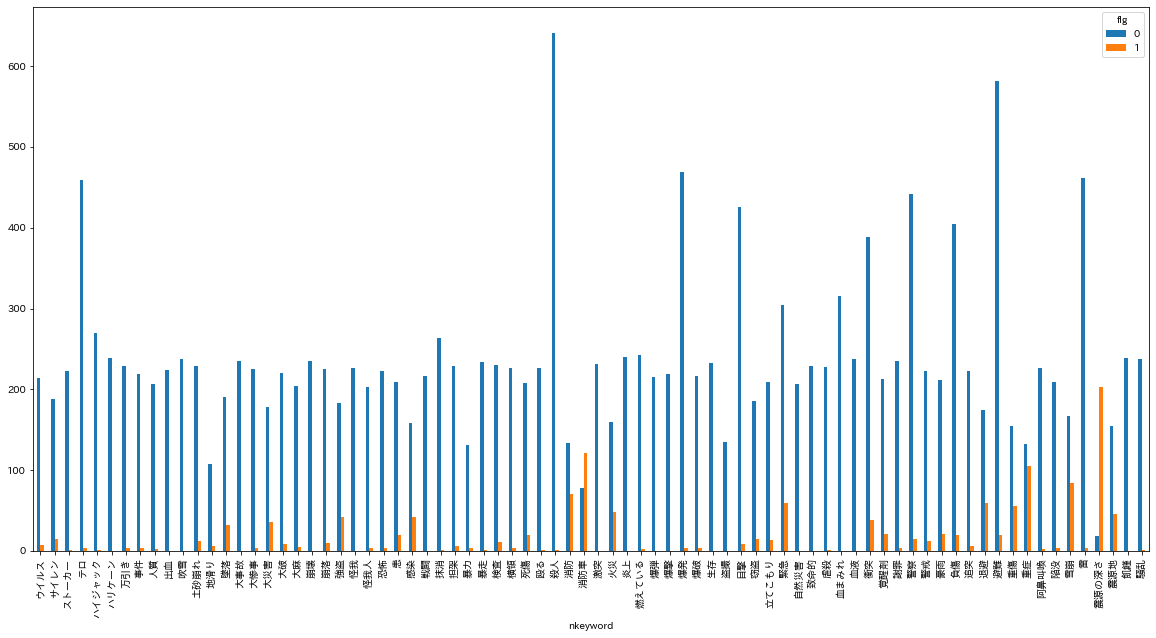

In [33]:
# df_by_uniqk = df
df_by_uniqk = df[df.querynum == 1].groupby('nkeyword').flg.value_counts().unstack()
# df_by_uniqk['querynum'] = df['querynum']
# df_by_uniqk['flg'] = df['flg']
df_by_uniqk.plot(kind='bar', figsize=(20, 10))

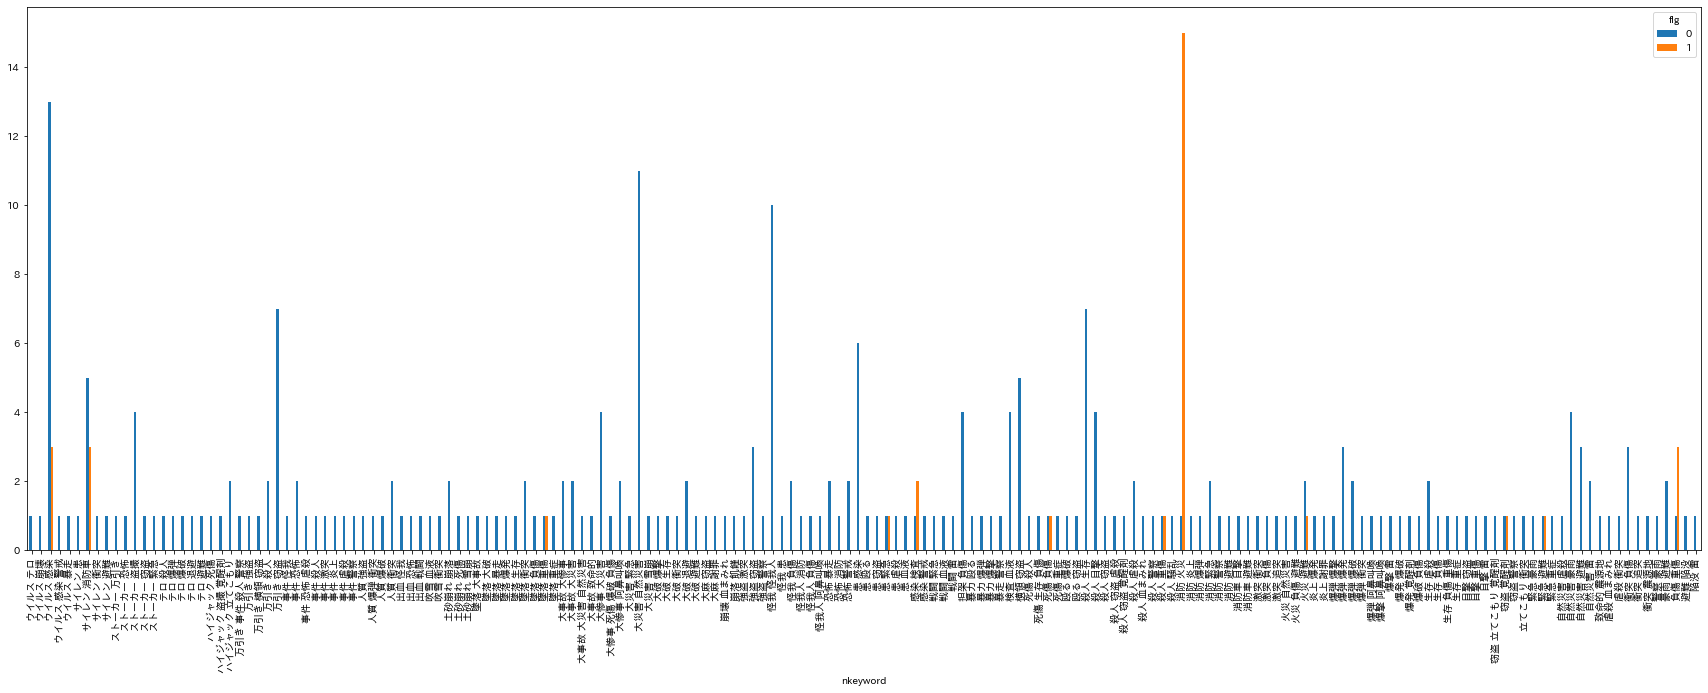

In [34]:
df_by_nkeyword = df[df_.querynum > 1].groupby('nkeyword').flg.value_counts().unstack()
df_by_nkeyword[df_by_nkeyword[0] < 30].plot(kind='bar', figsize=(30, 10))

In [35]:
df.groupby('nkeyword').flg.value_counts().to_dict()

{('ウイルス', 0): 214,
 ('ウイルス', 1): 7,
 ('ウイルス テロ', 0): 1,
 ('ウイルス 崩壊', 0): 1,
 ('ウイルス 患', 1): 1,
 ('ウイルス 感染', 0): 13,
 ('ウイルス 感染', 1): 3,
 ('ウイルス 感染 警戒', 0): 1,
 ('ウイルス 暴走', 0): 1,
 ('ウイルス 震源地', 1): 2,
 ('サイレン', 0): 188,
 ('サイレン', 1): 14,
 ('サイレン 患', 0): 1,
 ('サイレン 消防車', 0): 5,
 ('サイレン 消防車', 1): 3,
 ('サイレン 衝突', 0): 1,
 ('サイレン 避難', 0): 1,
 ('ストーカー', 0): 222,
 ('ストーカー', 1): 1,
 ('ストーカー 万引き', 0): 1,
 ('ストーカー 恐怖', 0): 1,
 ('ストーカー 盗撮', 0): 4,
 ('ストーカー 窃盗', 0): 1,
 ('ストーカー 緊急', 0): 1,
 ('テロ', 0): 459,
 ('テロ', 1): 4,
 ('テロ 殺人', 0): 1,
 ('テロ 爆弾', 0): 1,
 ('テロ 爆破', 0): 1,
 ('テロ 退避', 0): 1,
 ('テロ 避難', 0): 1,
 ('ハイジャック', 0): 270,
 ('ハイジャック', 1): 1,
 ('ハイジャック 死傷', 0): 1,
 ('ハイジャック 盗撮 覚醒剤', 0): 1,
 ('ハイジャック 立てこもり', 0): 2,
 ('ハリケーン', 0): 239,
 ('万引き', 0): 229,
 ('万引き', 1): 3,
 ('万引き 事件 殺人 警察', 0): 1,
 ('万引き 強盗', 0): 1,
 ('万引き 横領 窃盗', 0): 1,
 ('万引き 殺人', 0): 2,
 ('万引き 窃盗', 0): 7,
 ('事件', 0): 219,
 ('事件', 1): 3,
 ('事件 怪我', 0): 1,
 ('事件 恐怖', 0): 2,
 ('事件 恐怖 虐殺', 0): 1,
 ('事件 殺人', 0): 1,
 ('事件 激突', 0): 1,
